<img style="float:right" src="images/logo_va.png" /> 

# Visione Artificiale
## Esercitazione: Template matching

### Sommario
* Ricerca di un oggetto all'interno di un'immagine mediante template matching
* Ricerca di template multipli ottenuti modificando il fattore si scala di un template base
* Template matching su feature diverse dai semplici pixel dell'immagine
* Ricerca di più istanze dello stesso oggetto mediante template matching

Iniziamo con l'importazione dei moduli che ci serviranno: `NumPy`, `OpenCV`, `va`. Importiamo anche la funzione `interact` di Jupyter.

In [1]:
import numpy as np
import cv2 as cv
import va
from ipywidgets import interact

In questa esercitazione utilizzeremo alcune tecniche apprese a lezione, per risolvere un problema che per anni ha impegnato persone di ogni età in tutto il mondo: **la ricerca di Waldo**.
Consiste nel cercare il noto personaggio all'interno di un'immagine come quella che viene mostrata eseguendo la cella seguente.

In [2]:
img1 = cv.imread('tm/WhereIsWaldo1.jpg')
#va.show(img1)

<img style="float:left" src="images/ar.png" />**Esercizio 1** - Utilizzando il template matching, cercare all'interno dell'immagine `img1`, creata dalla cella precedente, il template contenuto nell'immagine "tm/t1.png". La misura del grado di somiglianza può essere effettuata con il metodo che si preferisce, purchè sia efficace. Eventualmente eseguire dei test con più metodi. Completare la funzione `FindWaldo1` che deve restituire una tupla `(x, y, w, h)`, in cui `x, y` sono le coordinate del vertice superiore sinistro della posizione dell'oggetto dell'immagine e `w, h` sono le sue dimensioni (pari a quelle del template).  
Suggerimenti: la funzione `cv.minMaxLoc` può essere utile per cercare la posizione in cui la corrispondenza con il template è massima.

In [3]:
# --- Svolgimento Esercizio 1: Inizio --- #
va.show("tm/t1.png")

def FindWaldo1():
    template = cv.imread("tm/t1.png", cv.IMREAD_GRAYSCALE)
    img1_grey = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    h, w = template.shape
    R = cv.matchTemplate(img1_grey, template, cv.TM_CCOEFF_NORMED)
    _, r_max, _, pos_max = cv.minMaxLoc(R)

    return (*pos_max, w, h)

# --- Svolgimento Esercizio 1: Fine --- #

""
""


<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente consente di visualizzare il risultato ottenuto e di verificare che sia corretto.

In [4]:
rect = FindWaldo1()
va.test_tm_1(rect)
#va.show(cv.rectangle(img1.copy(), rect[:2], (rect[0]+rect[2], rect[1]+rect[3]), (255,0,0), 3))

Controllo posizione Waldo
""


L'obiettivo del prossimo esercizio è lo stesso del precedente: trovare la posizione di Waldo, utilizzando "tm/t2.png" come template nell'immagine "tm/WhereIsWaldo2.jpg". La differenza è che in questo caso il template fornito è un po' più piccolo rispetto all'immagine. Sarà necessario creare più copie del template modificandone il fattore di scala e cercare ciascuna di queste all'interno dell'immagine, per poi selezionare il template e la posizione che hanno ottenuto la massima somiglianza.

In [5]:
img2 = cv.imread('tm/WhereIsWaldo2.jpg')
#va.show(img2)

""
""

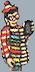

In [6]:
template2 = cv.imread('tm/t2.png')
va.show(template2, enlarge_small_images=False)

<img style="float:left" src="images/ar.png" />**Esercizio 2** - Creare una lista di immagini `templates` a partire da `template2`, utilizzando i seguenti fattori di scala: 100%, 120%, 140% e 160%. Prestare particolare attenzione alla dimensione delle immagini: larghezza e altezza dovranno essere arrotondate all'intero più vicino in base al corrispondente fattore di scala. Questo può essere ottenuto, ad esempio, sfruttando con gli appropriati parametri una certa funzione OpenCV. Eseguire poi la cella successiva per controllare che le dimensioni delle immagini nella lista siano quelle attese.

In [7]:
# --- Svolgimento Esercizio 2: Inizio --- #

#templates = [cv.resize(template2, None, None, s, s) for s in (1.0, 1.2, 1.4, 1.6)]

templates = []
for scale in range(100,180,20):
    height = round(template2.shape[0] * scale / 100)
    width = round(template2.shape[1] * scale / 100)
    templates.append(cv.resize(template2, (width, height)))


# --- Svolgimento Esercizio 2: Fine --- #

,,,
,,,

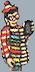
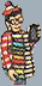
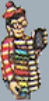
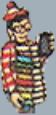

Dimensioni al 100%,Dimensioni al 120%,Dimensioni al 140%,Dimensioni al 160%
,,,


In [8]:
va.show(*templates, enlarge_small_images=False)
va.test_tm_2(templates)

<img style="float:left" src="images/ar.png" />**Esercizio 3** - Utilizzando il template matching, cercare, all'interno dell'immagine `img2`, ciascun template nella lista `templates` e restituire la posizione di quello che ha la massima somiglianza. Si suggerisce di utilizzare un metodo normalizzato per misurare il grado di somiglianza, in modo da essere indipendenti dalle dimensioni del template. Completare la funzione `FindWaldo2`, che deve restituire una tupla `(x, y, w, h)`, in cui `x, y` sono le coordinate del vertice superiore sinistro della posizione dell'oggetto dell'immagine e `w, h` sono le sue dimensioni (pari a quelle del template, fra tutti quelli nella lista, che è risultato più simile).

In [9]:
# --- Svolgimento Esercizio 3: Inizio --- #

def FindWaldo2():
    r_max = 0
    x_f = 0
    y_f = 0
    shape_w = 0
    shape_h = 0
    for templ in templates:
        res = cv.matchTemplate(img2, templ, cv.TM_CCOEFF_NORMED)
        _, r_max_tmp, _, (x,y) = cv.minMaxLoc(res)
        if (r_max_tmp > r_max):
            r_max = r_max_tmp
            x_f = x
            y_f = y
            shape_h = templ.shape[0]
            shape_w = templ.shape[1]
    
    return (x_f, y_f, shape_w, shape_h)


# --- Svolgimento Esercizio 3: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente consente di visualizzare il risultato ottenuto e di verificare che sia corretto, sia come posizione che come dimensione del rettangolo.

In [10]:
rect = FindWaldo2()
va.test_tm_3(rect)
#va.show(cv.rectangle(img2.copy(), rect[:2], (rect[0]+rect[2], rect[1]+rect[3]), (255,0,0), 3))

Controllo posizione Waldo
""


Nella terza e ultima ricerca di Waldo che affrontiamo, per un problema tecnico il template da cercare è costituito solo dai bordi: sarà necessario trovare un modo per risolvere anche questo problema. Le due celle seguenti, una volta eseguite, caricano l'immagine (`img3`) e il template da cercare (`template3`).

In [11]:
img3 = cv.imread('tm/WhereIsWaldo3.jpg')
#va.show(img3)

""
""

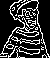

In [12]:
template3 = cv.imread('tm/t3.png', cv.IMREAD_GRAYSCALE)
va.show(template3, enlarge_small_images=False)

<img style="float:left" src="images/ar.png" />**Esercizio 4** - Utilizzando il template matching, cercare, all'interno dell'immagine `img3`, il template `template3`. In primo luogo verificare che un semplice procedimento come quello del primo esercizio in questo caso non può portare al risultato desiderato; cercare quindi un modo di trasformare il template o l'immagine per poter applicare con successo il template matching. Completare la funzione `FindWaldo3`, che deve restituire una tupla `(x, y, w, h)`, in cui `x, y` sono le coordinate del vertice superiore sinistro della posizione dell'oggetto dell'immagine e `w, h` sono le sue dimensioni (pari a quelle del template).

In [13]:
# --- Svolgimento Esercizio 4: Inizio --- #

def FindWaldo3():
    img_canny = cv.Canny(img3, 200, 100)
    result = cv.matchTemplate(img_canny, template3, cv.TM_CCOEFF_NORMED)
    _, r_max, _, (x,y) = cv.minMaxLoc(result)

    return (x,y, template3.shape[1], template3.shape[0])


# --- Svolgimento Esercizio 4: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente consente di visualizzare il risultato ottenuto e di verificare che sia corretto.

In [14]:
rect = FindWaldo3()
va.test_tm_4(rect)
#va.show(cv.rectangle(img3.copy(), rect[:2], (rect[0]+rect[2], rect[1]+rect[3]), (255,0,0), 3))

Controllo posizione Waldo
""


Negli esercizi precedenti, in ogni immagine si doveva cercare *un solo oggetto*: era quindi sufficiente cercare il massimo (o il minimo, a seconda del metodo utilizzato) del valore di somiglianza su tutti i pixel. Nell'ultima parte dell'esercitazione affronteremo il caso in cui *più copie dell'oggetto di interesse siano presenti* e vadano individuate all'interno dell'immagine.  
Si considerino l'immagine e il template che sono caricati e visualizzati eseguendo la cella seguente.

,
,

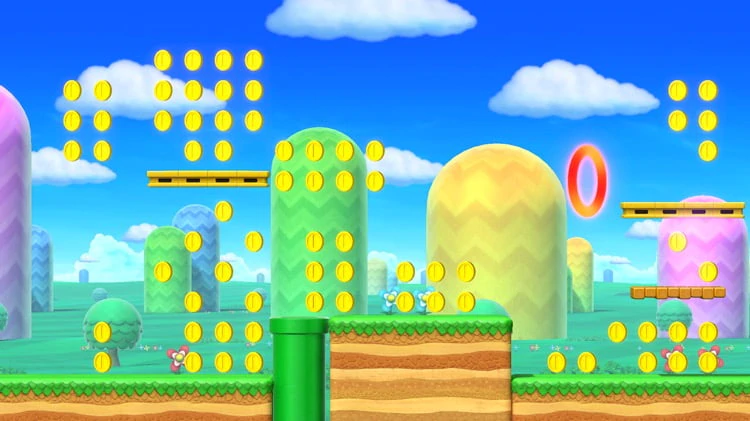

In [15]:
img, template = cv.imread('tm/many_coins.png'), cv.imread('tm/coin.png')
va.show(img, template, enlarge_small_images=False)

<img style="float:left" src="images/ar.png" />**Esercizio 5** - Utilizzando il template matching, cercare, all'interno dell'immagine `img`, tutte le posizioni in cui compare il template `template`. Completare il codice nella cella seguente che deve creare una lista di tuple `(x, y, w, h)` (`rettangoli`), in cui, per ogni oggetto individuato, `x, y` sono le coordinate del suo vertice superiore sinistro e `w, h` sono le sue dimensioni (pari a quelle del template). In queso esercizio non è richiesto di trovare un solo rettangolo per ogni oggetto: è possibile che lo stesso oggetto sia trovato più volte, in posizioni molto vicine fra loro. Questo problema sarà poi affrontato nell'ultimo esercizio.  
Suggerimenti: sarà necessario determinare una soglia da applicare al valore di somiglianza dei pixel, per poi restituire tutte le posizioni il cui valore di somiglianza supera tale soglia (nell'ipotesi di utilizzare un metodo in cui i valori più alti indicano maggior somiglianza). Una possibile strategia per scegliere una soglia ragionevole può essere individuare il valore massimo di somiglianza e impostare la soglia relativamente a tale valore (ad esempio come 70% del valore massimo).

In [16]:
# --- Svolgimento Esercizio 5: Inizio --- #

result = cv.matchTemplate(img, template, cv.TM_CCOEFF_NORMED)
h, w = template.shape[:2]
treshold = result.max() * 0.7

rettangoli = [(int(x), int(y), w, h) for (y, x) in list(zip(*np.nonzero(result > treshold)))]

# --- Svolgimento Esercizio 5: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente consente di visualizzare il risultato ottenuto e di verificare che tutti gli oggetti siano individuati da almeno uno dei rettangoli nella lista.

In [17]:
va.test_tm_5(rettangoli)
tmp = img.copy()
for (x, y, w, h) in rettangoli:
    cv.rectangle(tmp, (x, y), (x+w, y+h), (0,0,255), 1)
#va.show(tmp)

Controllo monete: 1296/71
""


<img style="float:left" src="images/ar.png" />**Esercizio 6** - A partire dalla lista `rettangoli`, ottenere una nuova lista `rettangoli_ok` che contenga un solo rettangolo per ogni oggetto da individuare. In altre parole, in caso di più rettangoli sovrapposti, è richiesto di considerarne solo uno: quello che corrisponde al valore di somiglianza più alto con il template.  
Suggerimenti: fra le possibili strategie, una consiste nello sfruttare la funzione OpenCV `cv.dnn.NMSBoxes` che, anche se fa parte del modulo sulle reti neurali, può essere utile in questo caso. Se si decide di procedere in questo modo, oltre a studiare la documentazione di tale funzione, è necessario assicurarsi che: 1) la lista di rettangoli passata a `cv.dnn.NMSBoxes` contenga tuple i cui valori sono tutti di tipo `int` Python e non di un tipo NumPy; 2) la lista di valori di somiglianza (scores) che tale funzione richiede contenga valori di tipo `float` Python.

In [18]:
# --- Svolgimento Esercizio 6: Inizio --- #

scores_ret = [float(result[y,x]) for (x,y,_,_) in rettangoli]

index_ok = (cv.dnn.NMSBoxes(rettangoli, scores_ret, 0, 0)).squeeze()

# selezionare un solo rettangolo per ogni oggetto
rettangoli_ok = [rettangoli[i] for i in index_ok]


# --- Svolgimento Esercizio 6: Fine --- #

<img style="float:left" src="images/in.png" />L'esecuzione della cella seguente consente di visualizzare il risultato ottenuto e di verificare che tutti gli oggetti siano individuati, ciascuno da un solo rettangolo.

Controllo monete: 71/71
""


""
""

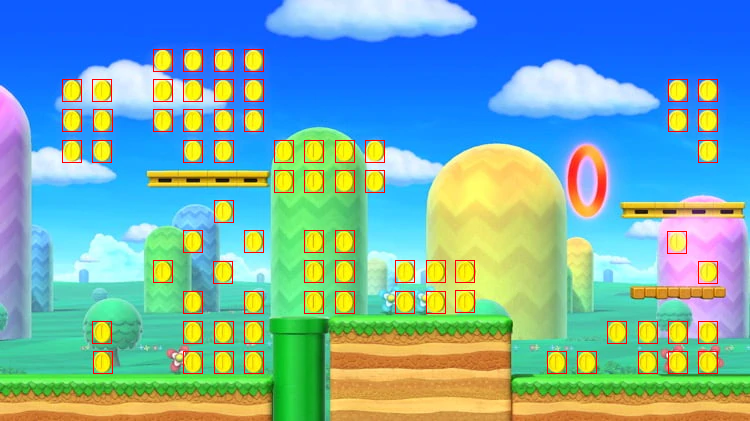

In [19]:
va.test_tm_6(rettangoli_ok)
tmp = img.copy()
for (x, y, w, h) in rettangoli_ok:
    cv.rectangle(tmp, (x, y), (x+w, y+h), (0,0,255), 1)
va.show(tmp)